In [1]:
import networkx as nx
import pandas as pd
import networkx as nx


In [2]:

def vertex_sort_hierarchy(G):
    """
    Performs vertex-sort based hierarchical decomposition on a directed graph (e.g., TRN).
    
    Returns:
        hierarchy_level: dict {node: level}, where level is an integer (0 is highest layer).
    """
    G = G.copy()  # Work on a copy to preserve the original
    hierarchy_level = {}
    level = 0

    while G.nodes:
        # Find all source nodes (in-degree == 0)
        sources = [n for n in G.nodes if G.in_degree(n) == 0]

        if not sources:
            # If there are cycles or remaining nodes with in-degree > 0,
            # break cycles with a heuristic: pick nodes with min in-degree
            min_in_deg = min(G.in_degree(n) for n in G.nodes)
            sources = [n for n in G.nodes if G.in_degree(n) == min_in_deg]

        for node in sources:
            hierarchy_level[node] = level
        G.remove_nodes_from(sources)
        level += 1

    return hierarchy_level


In [3]:
pre_dfRegNet = pd.read_csv('tableData.csv')  
dfRegNet = pre_dfRegNet[pd.notna(pre_dfRegNet['3)RegulatorGeneName'])] #dropping NaN 
print(dfRegNet.shape)

#DiGraph g
regnet = dfRegNet.loc[:, ['3)RegulatorGeneName', '5)regulatedName']]
g  = nx.DiGraph()
g.add_edges_from(regnet.values)

(6975, 7)


In [11]:
g_test = nx.DiGraph()
g_test.add_edges_from([
    ('TF1', 'GeneA'), ('TF1', 'GeneB'),
    ('TF2', 'TF1'), ('TF2', 'GeneC'),
    ('GeneC', 'GeneD')
])

hierarchy = vertex_sort_hierarchy(g)
for node, lvl in sorted(hierarchy.items(), key=lambda x: x[1]):
    print(f"Node {node} is in layer {lvl}")


Node dicF is in layer 0
Node chiX is in layer 0
Node istR is in layer 0
Node rseX is in layer 0
Node rydC is in layer 0
Node ohsC is in layer 0
Node symR is in layer 0
Node arrS is in layer 0
Node sdsN is in layer 0
Node agrB is in layer 0
Node ralA is in layer 0
Node micL is in layer 0
Node C0293 is in layer 0
Node sdsR is in layer 0
Node sibC is in layer 0
Node micA is in layer 0
Node sraG is in layer 0
Node glmZ is in layer 0
Node asflhD is in layer 0
Node stfZ is in layer 0
Node ameF is in layer 0
Node yrdG is in layer 0
Node accA;accD is in layer 0
Node rpsR;rpsF is in layer 0
Node ebgR is in layer 0
Node atoC is in layer 0
Node hupA;hupB is in layer 0
Node fabR is in layer 0
Node modE is in layer 0
Node zur is in layer 0
Node nsrR is in layer 0
Node hypT is in layer 0
Node flhD;flhC is in layer 0
Node pgrR is in layer 0
Node envR is in layer 0
Node pyrR is in layer 0
Node glaR is in layer 0
Node bglJ;rcsB is in layer 0
Node rtcR is in layer 0
Node cueR is in layer 0
Node kdpE is 

In [22]:
def visualize_hierarchy_networkx(G, hierarchy_levels):
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    import random 
    
    # Create a color map
    max_level = max(hierarchy_levels.values())
    cmap = cm.get_cmap('viridis', max_level + 1)
    
    # Set node colors based on hierarchy level
    node_colors = [cmap(hierarchy_levels[node]) for node in G.nodes()]
    
    # Position nodes by hierarchy (vertically) and randomly (horizontally)
    pos = {}
    for node, level in hierarchy_levels.items():
        pos[node] = (random.random(), -level)  # Negative to have level 0 at top
    
    # Draw the network
    plt.figure(figsize=(12, 10))
    nx.draw_networkx(
        G, pos=pos, with_labels=True, node_color=node_colors, 
        node_size=100, font_size=8, arrowsize=10
    )
    
    # Create a colorbar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, max_level))
    sm.set_array([])
    # cbar = plt.colorbar(sm)
    cbar.set_label('Hierarchy Level')
    
    plt.title('Network Hierarchy Visualization')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('hierarchy_visualization.png', dpi=300)
    plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_27348\4066922824.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max_level + 1)


NameError: name 'cbar' is not defined

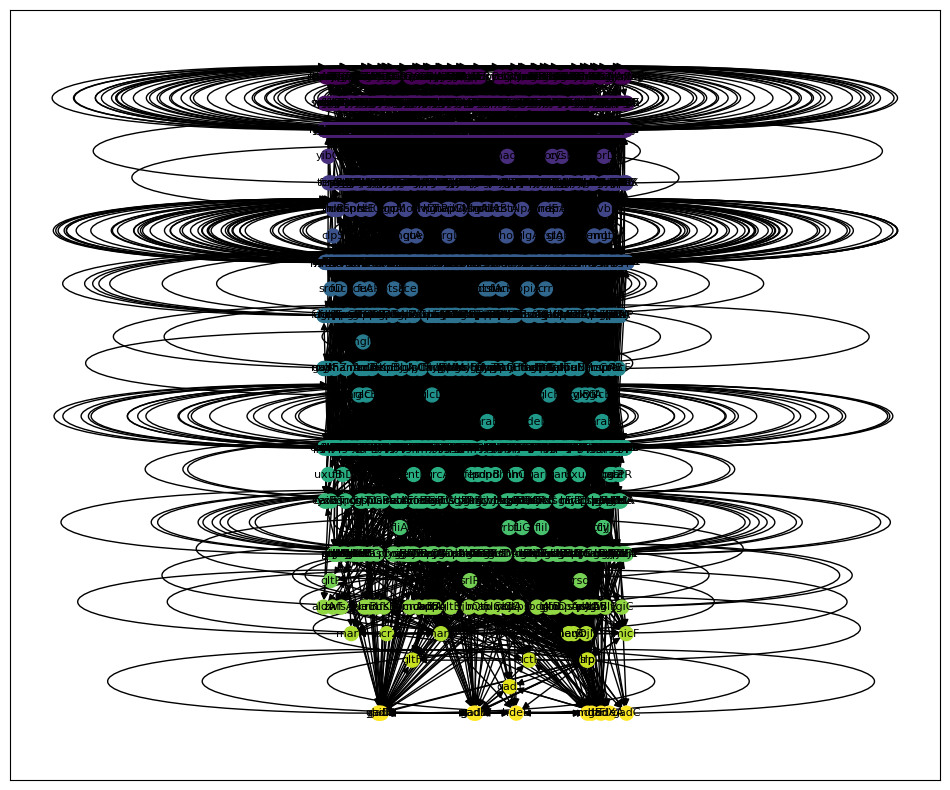

In [23]:
visualize_hierarchy_networkx(g, hierarchy)